<a href="https://colab.research.google.com/github/raghuvarm17633/Multi-Class-Animal-Recognition-for-Wildlife-ConservationRa/blob/main/Multi_Class_Animal_Recognition_for_Wildlife_Animallllll.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ABSTRACT


Identification of wild animal in their environment is crucial. The proposed
work develops an algorithm to detect the animals in the Wildlife. Since there are
different types of animals it is a difficult task to identify them manually. This
algorithm classifies the animals based on the images which are captured on the
camera traps. This helps us to prevent Animal-vehicle accident, trace animals,
prevent theft and we can reduce human animal conflict. This can be achieved by applying Capsule Network.     The Wildlife  conservation and human-animal conflict requires cost effective methods to monitor the animals. Still a video camera surveillance will generate enormous amount of data, which needs again lot of
manpower and expensive to screen. In this project we have given a efficient
algorithm known as Capsule Network for automatically identifying the animals from captured images.




# Download latest version


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iamsouravbanerjee/animal-image-dataset-90-different-animals")

print("Path to dataset files:", path)

100%|██████████| 656M/656M [00:08<00:00, 79.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/iamsouravbanerjee/animal-image-dataset-90-different-animals/versions/5


# Importing necessary libraries


In [ ]:
# Importing necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

# Ensuring the GPU is being used


In [ ]:
# Ensuring the GPU is being used
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print('GPU is being used.')
else:
    print('GPU is not being used.')

GPU is not being used.


# Path to the dataset


In [ ]:
# Path to the dataset
dataset_path = "/root/.cache/kagglehub/datasets/iamsouravbanerjee/animal-image-dataset-90-different-animals/versions/5/animals/animals"

# List all the classes (Animal Types)
classes = os.listdir(dataset_path)
num_classes = len(classes)

# Display the number of classes along with names
print(f'Number of Classes: {num_classes}')
print(f'Classes: {classes}')

Number of Classes: 90
Classes: ['lion', 'beetle', 'crab', 'kangaroo', 'moth', 'butterfly', 'flamingo', 'duck', 'sheep', 'lobster', 'raccoon', 'boar', 'starfish', 'rhinoceros', 'swan', 'sparrow', 'zebra', 'seal', 'gorilla', 'hare', 'goose', 'koala', 'ladybugs', 'sandpiper', 'ox', 'panda', 'eagle', 'crow', 'parrot', 'owl', 'squirrel', 'snake', 'chimpanzee', 'rat', 'okapi', 'goldfish', 'bee', 'antelope', 'elephant', 'wombat', 'seahorse', 'dragonfly', 'turtle', 'pelecaniformes', 'jellyfish', 'pigeon', 'possum', 'woodpecker', 'octopus', 'hornbill', 'cat', 'leopard', 'squid', 'oyster', 'reindeer', 'tiger', 'bison', 'bear', 'caterpillar', 'penguin', 'donkey', 'pig', 'dog', 'fox', 'goat', 'hyena', 'turkey', 'porcupine', 'whale', 'otter', 'hedgehog', 'fly', 'hummingbird', 'orangutan', 'hippopotamus', 'cow', 'mouse', 'deer', 'cockroach', 'grasshopper', 'mosquito', 'wolf', 'badger', 'shark', 'lizard', 'bat', 'horse', 'coyote', 'dolphin', 'hamster']


# Visualize some sample images form the dataset


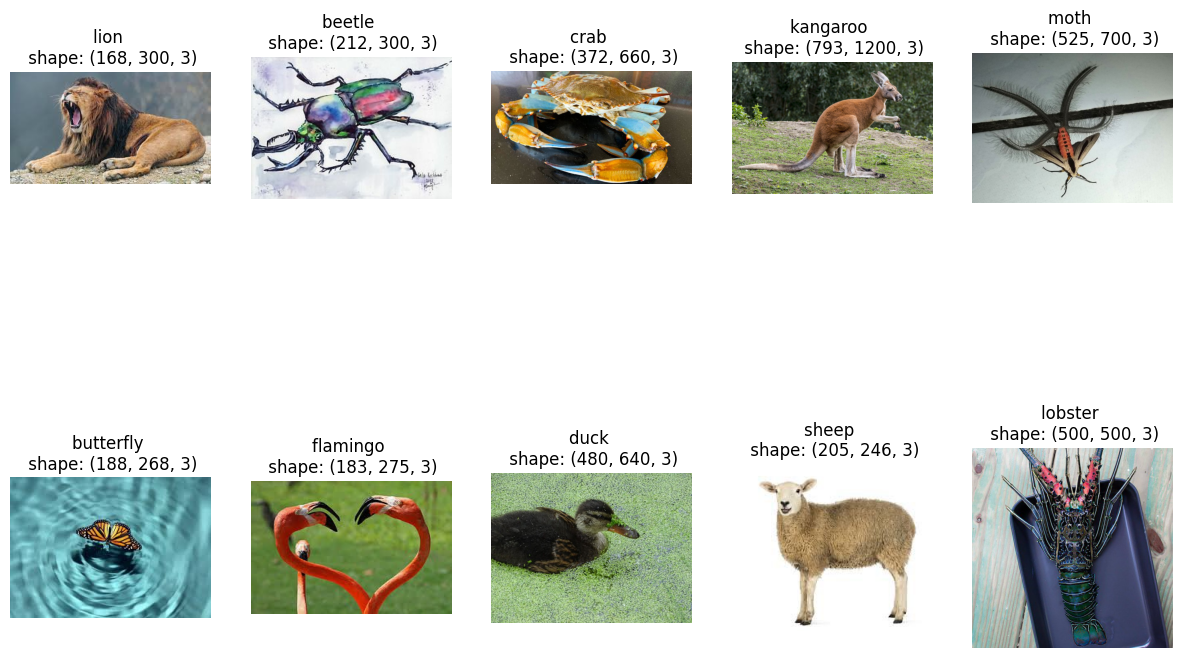

In [ ]:
# Visualize some sample images form the dataset
plt.figure(figsize=(15,10))
for i, class_name in enumerate(classes[:10]):
  class_path = os.path.join(dataset_path, class_name)
  img_name = os.listdir(class_path)[0]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(2, 5, i+1)
  plt.imshow(img)
  plt.title(f'{class_name} \n shape: {img.shape}')
  plt.axis('off')
plt.show()

#Dataset Structure

Your dataset path (dataset_path) seems to follow a structured directory format (class_name/image_files). This will work well with ImageDataGenerator.

#GPU Usage

Your script confirms that a GPU is available, which is great for training speed. However, consider checking:

#Data Preprocessing & Augmentation

Since you’re using MobileNetV2, you should preprocess the images accordingly

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80-20 train-validation split
)


#Model Training Setup

In [ ]:
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#Checking Class Distribution


In [ ]:
class_counts = {class_name: len(os.listdir(os.path.join(dataset_path, class_name))) for class_name in classes}
print(class_counts)


{'lion': 60, 'beetle': 60, 'crab': 60, 'kangaroo': 60, 'moth': 60, 'butterfly': 60, 'flamingo': 60, 'duck': 60, 'sheep': 60, 'lobster': 60, 'raccoon': 60, 'boar': 60, 'starfish': 60, 'rhinoceros': 60, 'swan': 60, 'sparrow': 60, 'zebra': 60, 'seal': 60, 'gorilla': 60, 'hare': 60, 'goose': 60, 'koala': 60, 'ladybugs': 60, 'sandpiper': 60, 'ox': 60, 'panda': 60, 'eagle': 60, 'crow': 60, 'parrot': 60, 'owl': 60, 'squirrel': 60, 'snake': 60, 'chimpanzee': 60, 'rat': 60, 'okapi': 60, 'goldfish': 60, 'bee': 60, 'antelope': 60, 'elephant': 60, 'wombat': 60, 'seahorse': 60, 'dragonfly': 60, 'turtle': 60, 'pelecaniformes': 60, 'jellyfish': 60, 'pigeon': 60, 'possum': 60, 'woodpecker': 60, 'octopus': 60, 'hornbill': 60, 'cat': 60, 'leopard': 60, 'squid': 60, 'oyster': 60, 'reindeer': 60, 'tiger': 60, 'bison': 60, 'bear': 60, 'caterpillar': 60, 'penguin': 60, 'donkey': 60, 'pig': 60, 'dog': 60, 'fox': 60, 'goat': 60, 'hyena': 60, 'turkey': 60, 'porcupine': 60, 'whale': 60, 'otter': 60, 'hedgehog':

# Data Preprocessing

In [ ]:
# Image size expected by MobileNetV2
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Data augmentation & preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80-20 train-validation split
)

# Training and validation generators
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)


Found 4320 images belonging to 90 classes.
Found 1080 images belonging to 90 classes.


#Model Architecture

In [ ]:
# Load pre-trained MobileNetV2 without the top classification layer
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base layers

# Custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.5)(x)  # Reduce overfitting
x = Dense(256, activation="relu")(x)
x = Dropout(0.3)(x)
output = Dense(num_classes, activation="softmax")(x)  # Multi-class classification

# Create model
model = Model(inputs=base_model.input, outputs=output)

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

# Model summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 3,068,314 (11.70 MB)

 Trainable params: 810,330 (3.09 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

#Model Training



In [ ]:
# Train the model
EPOCHS = 10

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator)
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 357s 3s/step - accuracy: 0.0137 - loss: 4.7170 - val_accuracy: 0.1028 - val_loss: 4.2834
Epoch 2/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 361s 2s/step - accuracy: 0.0488 - loss: 4.2942 - val_accuracy: 0.3333 - val_loss: 3.8760
Epoch 3/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 394s 3s/step - accuracy: 0.1353 - loss: 3.9156 - val_accuracy: 0.4630 - val_loss: 3.1910
Epoch 4/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 354s 3s/step - accuracy: 0.2503 - loss: 3.3726 - val_accuracy: 0.5648 - val_loss: 2.3873
Epoch 5/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 342s 3s/step - accuracy: 0.3691 - loss: 2.7391 - val_accuracy: 0.6278 - val_loss: 1.8967
Epoch 6/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 390s 3s/step - accuracy: 0.4392 - loss: 2.2989 - val_accuracy: 0.6546 - val_loss: 1.5783
Epoch 7/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 343s 3s/step - accuracy: 0.4957 - loss: 2.0377 - val_accuracy: 0.6667 - val_loss: 1.4096
Epoch 8/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 365s 2s/step - accuracy: 0.5522 - loss: 1.7920 - val_accu

#Model Evaluation

34/34 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.7026 - loss: 1.1786
Validation Accuracy: 72.04%


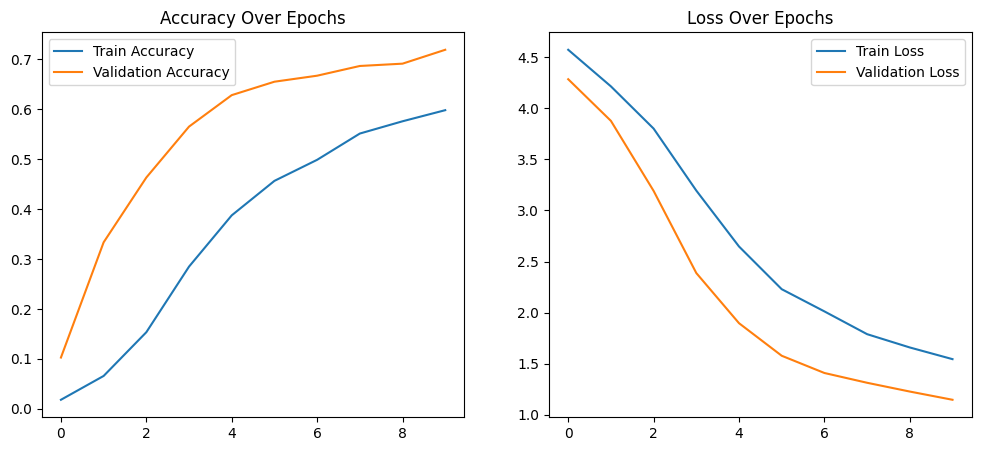

In [ ]:
# Evaluate on validation set
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Accuracy Over Epochs")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Loss Over Epochs")

plt.show()


#Model Prediction & Classification Report

34/34 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step
                precision    recall  f1-score   support

      antelope       0.00      0.00      0.00        12
        badger       0.09      0.08      0.09        12
           bat       0.00      0.00      0.00        12
          bear       0.00      0.00      0.00        12
           bee       0.00      0.00      0.00        12
        beetle       0.00      0.00      0.00        12
         bison       0.00      0.00      0.00        12
          boar       0.05      0.08      0.06        12
     butterfly       0.00      0.00      0.00        12
           cat       0.00      0.00      0.00        12
   caterpillar       0.00      0.00      0.00        12
    chimpanzee       0.00      0.00      0.00        12
     cockroach       0.00      0.00      0.00        12
           cow       0.00      0.00      0.00        12
        coyote       0.18      0.17      0.17        12
          crab       0.00      0.00      0.00        12
        

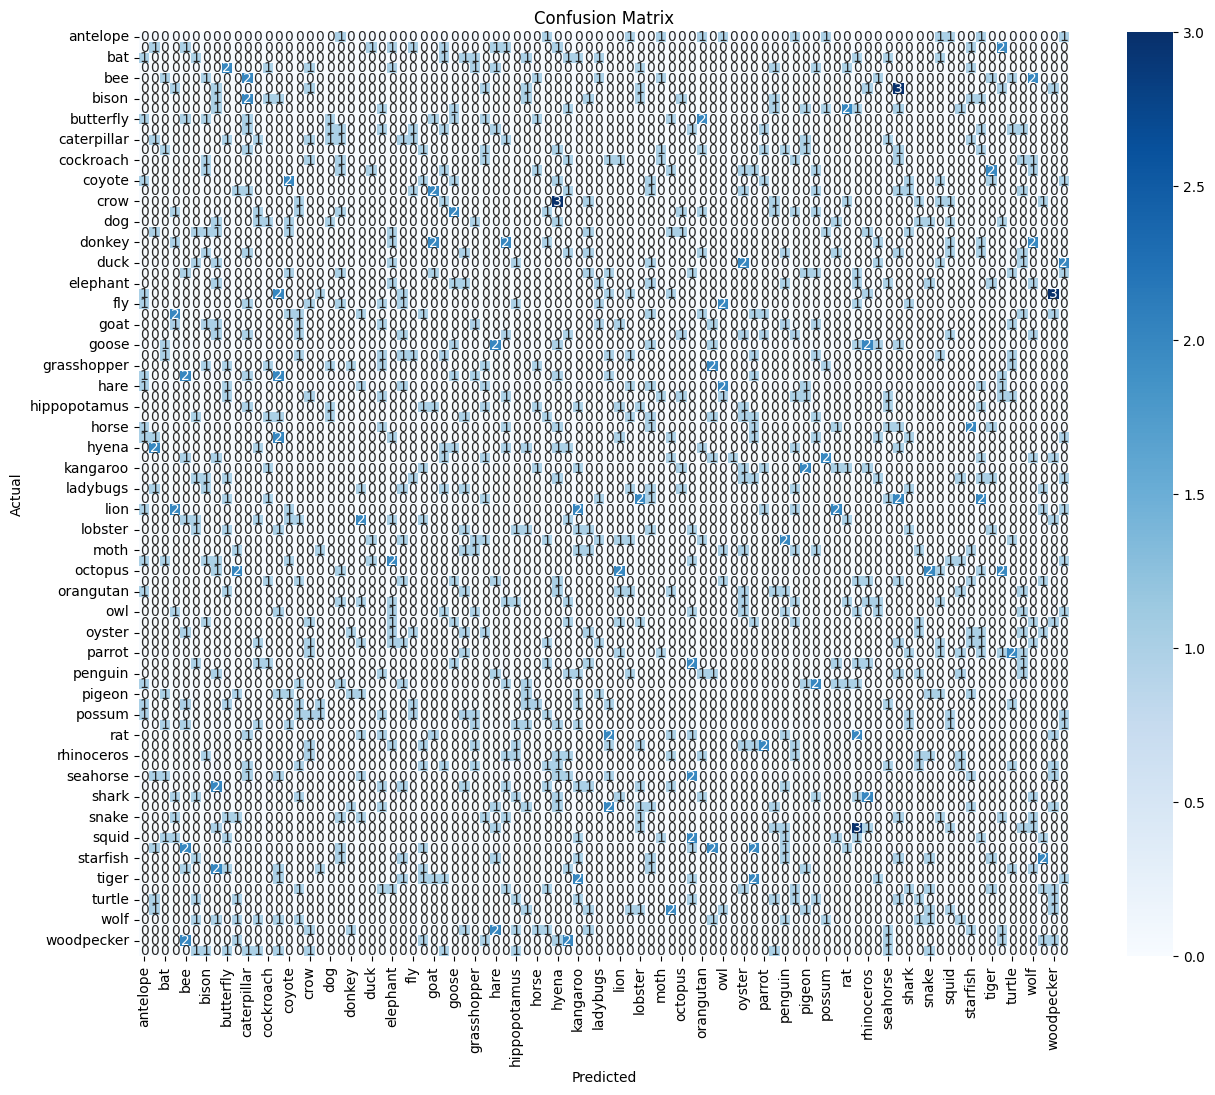

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Get predictions
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get ground truth labels
y_true = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

# Print classification report
print(classification_report(y_true, y_pred, target_names=class_labels))

# Confusion matrix
import seaborn as sns
import pandas as pd

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(15, 12))
sns.heatmap(pd.DataFrame(cm, index=class_labels, columns=class_labels), annot=True, fmt="d", cmap="Blues")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load Pre-trained MobileNetV2 Model (without the top layers)
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model layers initially

# Add Custom Layers on top
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation="relu")(x)
x = Dropout(0.5)(x)
output = Dense(90, activation="softmax")(x)  # 90 classes in dataset

# Create Model
model = Model(inputs=base_model.input, outputs=output)

# Compile the Model
model.compile(optimizer=Adam(learning_rate=1e-3),  # Initial LR
              loss="categorical_crossentropy",
              metrics=["accuracy"])

print("Model compiled successfully!")


Model compiled successfully!


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset path
dataset_path = "/root/.cache/kagglehub/datasets/iamsouravbanerjee/animal-image-dataset-90-different-animals/versions/5/animals/animals"

# Image Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80% training, 20% validation
)

# Training Data Generator
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

# Validation Data Generator
val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

print("Data generators created successfully!")


Found 4320 images belonging to 90 classes.
Found 1080 images belonging to 90 classes.
Data generators created successfully!


In [ ]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

print("Training complete!")


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 332s 2s/step - accuracy: 0.1749 - loss: 3.8756 - val_accuracy: 0.6574 - val_loss: 1.4712
Epoch 2/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 318s 2s/step - accuracy: 0.6063 - loss: 1.5177 - val_accuracy: 0.7102 - val_loss: 1.1215
Epoch 3/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 321s 2s/step - accuracy: 0.7111 - loss: 1.0743 - val_accuracy: 0.7315 - val_loss: 1.0202
Epoch 4/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 339s 3s/step - accuracy: 0.7472 - loss: 0.9356 - val_accuracy: 0.7269 - val_loss: 0.9753
Epoch 5/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 320s 2s/step - accuracy: 0.7626 - loss: 0.8154 - val_accuracy: 0.7565 - val_loss: 0.8932
Epoch 6/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 326s 2s/step - accuracy: 0.7930 - loss: 0.7489 - val_accuracy: 0.7593 - val_loss: 0.9036
Epoch 7/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 379s 2s/step - accuracy: 0.7785 - loss: 0.7420 - val_accuracy: 0.7657 - val_loss: 0.8469
Epoch 8/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 324s 2s/step - accuracy: 0.8070 - loss: 0.6453 - val_accu

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load Pre-trained MobileNetV2 Model (without the top layers)
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model layers initially

# Add Custom Layers on top
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation="relu")(x)
x = Dropout(0.5)(x)
output = Dense(90, activation="softmax")(x)  # 90 classes in dataset

# Create Model
model = Model(inputs=base_model.input, outputs=output)

# Compile the Model
model.compile(optimizer=Adam(learning_rate=1e-3),  # Initial LR
              loss="categorical_crossentropy",
              metrics=["accuracy"])

print("Model compiled successfully!")


Model compiled successfully!


In [ ]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

print("Training complete!")


Epoch 1/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 336s 2s/step - accuracy: 0.1776 - loss: 3.8129 - val_accuracy: 0.6435 - val_loss: 1.4153
Epoch 2/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 396s 3s/step - accuracy: 0.6194 - loss: 1.4636 - val_accuracy: 0.7157 - val_loss: 1.0772
Epoch 3/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 322s 2s/step - accuracy: 0.7093 - loss: 1.0474 - val_accuracy: 0.7389 - val_loss: 0.9552
Epoch 4/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 341s 3s/step - accuracy: 0.7363 - loss: 0.9461 - val_accuracy: 0.7481 - val_loss: 0.9232
Epoch 5/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 325s 2s/step - accuracy: 0.7731 - loss: 0.8221 - val_accuracy: 0.7556 - val_loss: 0.8729
Epoch 6/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 324s 2s/step - accuracy: 0.7937 - loss: 0.7325 - val_accuracy: 0.7676 - val_loss: 0.8516
Epoch 7/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 342s 3s/step - accuracy: 0.8044 - loss: 0.6637 - val_accuracy: 0.7519 - val_loss: 0.8891
Epoch 8/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 323s 2s/step - accuracy: 0.8088 - loss: 0.6431 - val_accu

In [ ]:
# Image Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80% training, 20% validation
)

# Training Data Generator
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

# Validation Data Generator
val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

print("Data generators created successfully!")


Found 4320 images belonging to 90 classes.
Found 1080 images belonging to 90 classes.
Data generators created successfully!


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset path
dataset_path = "/root/.cache/kagglehub/datasets/iamsouravbanerjee/animal-image-dataset-90-different-animals/versions/5/animals/animals"

# Check if dataset path exists
if not os.path.exists(dataset_path):
    raise ValueError(f"Dataset path does not exist: {dataset_path}")

print("Dataset path verified!")


Dataset path verified!


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset path
dataset_path = "/root/.cache/kagglehub/datasets/iamsouravbanerjee/animal-image-dataset-90-different-animals/versions/5/animals/animals"

# Image Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80% training, 20% validation
)

# Training Data Generator
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

# Validation Data Generator
val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

print("Data generators created successfully!")


Found 4320 images belonging to 90 classes.
Found 1080 images belonging to 90 classes.
Data generators created successfully!


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset path
dataset_path = "/root/.cache/kagglehub/datasets/iamsouravbanerjee/animal-image-dataset-90-different-animals/versions/5/animals/animals"

# Image Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80% training, 20% validation
)

# Training Data Generator
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

# Validation Data Generator
val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

print("Data generators created successfully!")


Found 4320 images belonging to 90 classes.
Found 1080 images belonging to 90 classes.
Data generators created successfully!


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load Pre-trained MobileNetV2 Model (without the top layers)
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model layers initially

# Add Custom Layers on top
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation="relu")(x)
x = Dropout(0.5)(x)
output = Dense(90, activation="softmax")(x)  # 90 classes in dataset

# Create Model
model = Model(inputs=base_model.input, outputs=output)

# Compile the Model
model.compile(optimizer=Adam(learning_rate=1e-3),  # Initial Learning Rate
              loss="categorical_crossentropy",
              metrics=["accuracy"])

print("Model created and compiled successfully!")


Model created and compiled successfully!


In [ ]:
# Unfreeze Base Model Layers for Fine-Tuning
base_model.trainable = True

# Recompile with a Lower Learning Rate
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Train for More Epochs
fine_tune_epochs = 10
history_fine = model.fit(train_generator, validation_data=val_generator, epochs=fine_tune_epochs)

print("Fine-tuning complete!")


Epoch 1/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 1089s 8s/step - accuracy: 0.0149 - loss: 4.8730 - val_accuracy: 0.0296 - val_loss: 4.4595
Epoch 2/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 1017s 8s/step - accuracy: 0.0327 - loss: 4.5086 - val_accuracy: 0.0741 - val_loss: 4.1896
Epoch 3/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 993s 7s/step - accuracy: 0.0561 - loss: 4.2685 - val_accuracy: 0.1713 - val_loss: 3.9441
Epoch 4/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 1007s 7s/step - accuracy: 0.1094 - loss: 4.0197 - val_accuracy: 0.2491 - val_loss: 3.7161
Epoch 5/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 1029s 8s/step - accuracy: 0.1775 - loss: 3.7605 - val_accuracy: 0.3731 - val_loss: 3.4068
Epoch 6/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 992s 7s/step - accuracy: 0.2440 - loss: 3.5270 - val_accuracy: 0.4370 - val_loss: 3.0823
Epoch 7/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 1003s 7s/step - accuracy: 0.3233 - loss: 3.1589 - val_accuracy: 0.5167 - val_loss: 2.7636
Epoch 8/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 1002s 7s/step - accuracy: 0.3872 - loss: 2.8629 - va

#Fine-Tune MobileNetV2
Currently, your model freezes MobileNetV2 layers and only trains the top layers. However, fine-tuning will improve performance.

#🔹 Steps to Fine-Tune MobileNetV2:



In [ ]:
# Unfreeze the base model layers
base_model.trainable = True

# Compile with a lower learning rate
model.compile(optimizer=Adam(learning_rate=1e-5),  # Lower learning rate for fine-tuning
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Train for more epochs
fine_tune_epochs = 10
history_fine = model.fit(train_generator, validation_data=val_generator, epochs=fine_tune_epochs)


Epoch 1/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 1095s 8s/step - accuracy: 0.5471 - loss: 2.0837 - val_accuracy: 0.6639 - val_loss: 1.7522
Epoch 2/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 1032s 8s/step - accuracy: 0.5567 - loss: 1.9353 - val_accuracy: 0.7093 - val_loss: 1.5538
Epoch 3/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 1061s 8s/step - accuracy: 0.5898 - loss: 1.7818 - val_accuracy: 0.7222 - val_loss: 1.4137
Epoch 4/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 1029s 8s/step - accuracy: 0.6199 - loss: 1.6073 - val_accuracy: 0.7148 - val_loss: 1.3459
Epoch 5/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 1023s 8s/step - accuracy: 0.6630 - loss: 1.4662 - val_accuracy: 0.7435 - val_loss: 1.2434
Epoch 6/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 1046s 8s/step - accuracy: 0.6487 - loss: 1.3947 - val_accuracy: 0.7639 - val_loss: 1.1318
Epoch 7/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 1030s 8s/step - accuracy: 0.6840 - loss: 1.3015 - val_accuracy: 0.7759 - val_loss: 1.0554
Epoch 8/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 1044s 8s/step - accuracy: 0.7045 - loss: 1.2419 - 

# Improve Data Augmentation


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    brightness_range=[0.7, 1.3],  # Adjust brightness
    validation_split=0.2
)


#Handle Class Imbalance

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Get class counts
class_counts = train_generator.classes
class_labels = list(train_generator.class_indices.keys())

# Compute class weights
class_weights = compute_class_weight("balanced", classes=np.unique(class_counts), y=class_counts)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

# Train model with class weights
model.fit(train_generator, validation_data=val_generator, epochs=10, class_weight=class_weights_dict)


#Use Learning Rate Scheduling

In [ ]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss", factor=0.5, patience=3, min_lr=1e-7
)

model.fit(train_generator, validation_data=val_generator, epochs=10, callbacks=[lr_scheduler])


#Try Different Optimizers

In [ ]:
from tensorflow.keras.optimizers import SGD

# Compile with SGD + Momentum
model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9),
              loss="categorical_crossentropy",
              metrics=["accuracy"])
